Text(0.5, 1.0, 'Original Leaf Image')

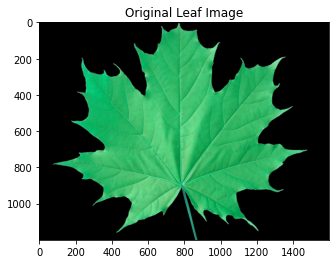

In [130]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgpath = "C:/Users/Mrudul/ML Projects/Leaf.png"
img = cv2.imread(imgpath) 
#cv2.imread(path, flag); flag = 0 [loads image in grayscale mode]; flag = 1[loads image in colour mode], flag = -1 [unchanged img]
plt.imshow(img)
plt.title("Original Leaf Image")

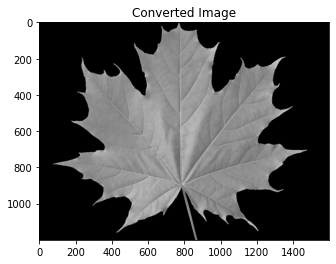

Number of Corners =  1044


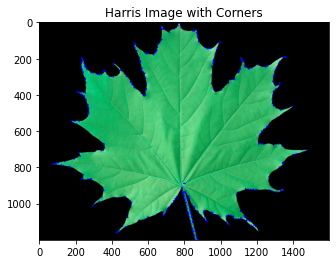

In [97]:
# apply the cv2.cornerHarris method, the method needs input image to be Grayscale and float32 type
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray32Img = np.float32(grayImg)
plt.imshow (gray32Img, cmap = 'gray')
plt.title ('Converted Image')
plt.show()

# Results are marked through the dilated corners
# corners = cv2.dilate(corners, None)
# using Harris on the same image (without changes)
# Reverting back to the original image,
# with optimal threshold value
# img[dest > 0.01 * dest.max()]=[0, 0, 255]

corners = cv2.cornerHarris(gray32Img, 2, 5, 0.07) #params --> imgpath, blockSize, kSize, Harris detector free parameter
num_corners = np.sum(corners > 0.01 * corners.max()) #calculting number of corners
print("Number of Corners = ", num_corners)
img2 = cv2.imread(imgpath)
corners2 = cv2.dilate(corners, None, iterations=3)
img2[corners2>0.01*corners2.max()] = [0,0,255] #BGR


# Displaying corners
plt.imshow (img2)
plt.title ('Harris Image with Corners')
plt.show()

img2 = cv2.resize(img2, (1080, 720))
cv2.imshow('Leaf image with Borders', img2)
# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

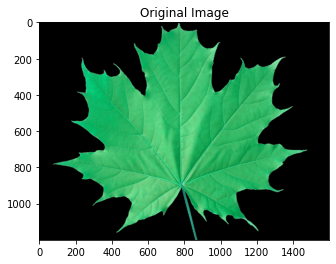

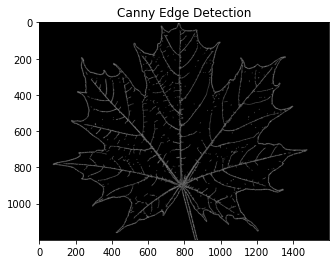

In [131]:
img3 = np.uint8(img)
edges = cv2.Canny(img3, 70, 120)

# plt.subplot (2,1,1), 
plt.imshow (img, cmap = 'gray')
plt.title ('Original Image')
# plt.xticks ([]), plt.yticks ([])
plt.show ()
# plt.subplot (2,1,2), 
plt.imshow (edges, cmap = 'gray')
plt.title ('Canny Edge Detection')
# plt.xticks ([]), plt.yticks ([])
plt.show ()

img3[edges>0.1*edges.max()] = [0,0,255] #BGR
img3 = cv2.resize(img3, (1080, 720))
cv2.imshow('Canny Edge Detection Image', img3)
# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()